### Car Price Predict
#### This project is aiming to predict car price with provided data.
#### I will mainly use multi-variable linear regression for predicting with necessary checking such as normality, independence etc...

### Feature Introduction

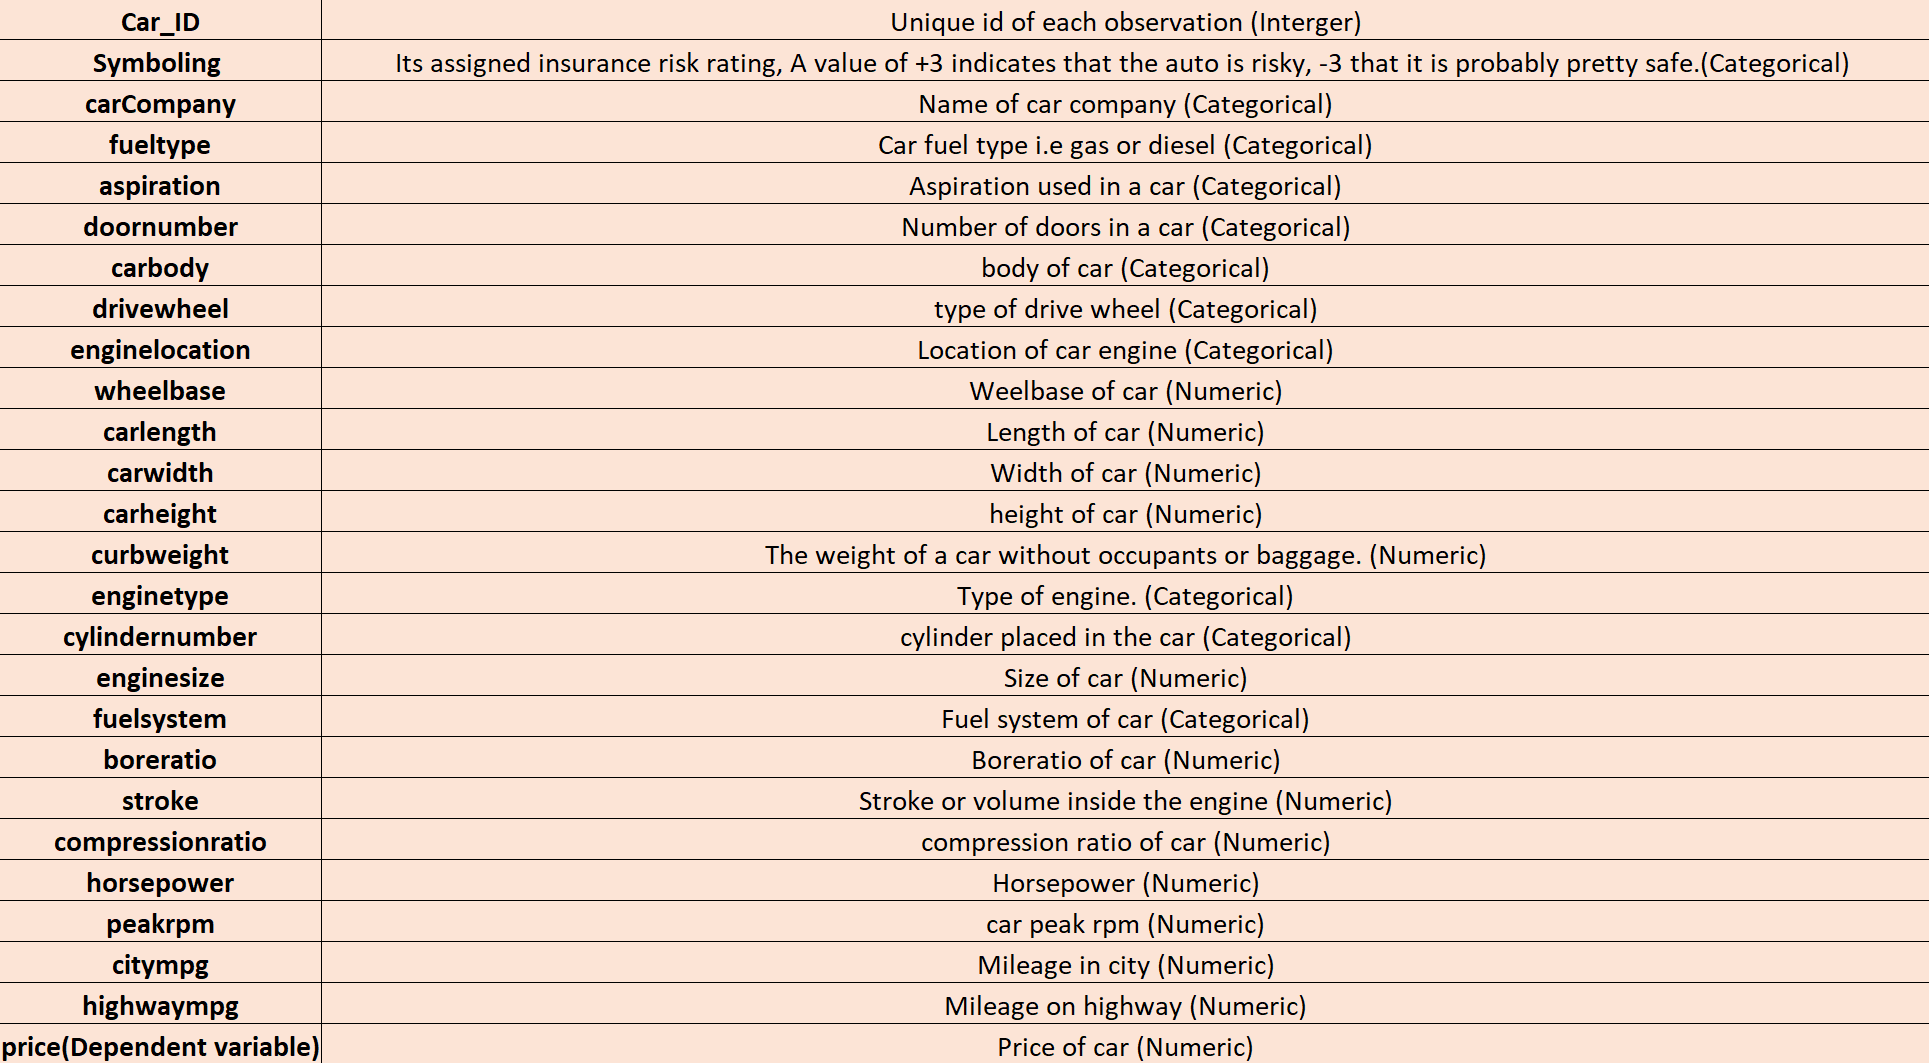


### Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Read dataset

In [2]:
df = pd.read_csv("CarPrice.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### data processing

#### Split CarName to Company and model

In [4]:
df[["Company", "Model"]] = df['CarName'].str.split(" ", n = 1, expand = True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


#### Drop None rows, CarName and car_ID

In [5]:
#for these rows, "Model" column is None, so we need to drop it
df = df.drop(df[~df["CarName"].str.contains(" ")].index, axis = 0)
df = df.drop(["CarName", "car_ID"], axis = 1)
df


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


#### correct typo for all category features

In [6]:
df["Company"] = df["Company"].str.replace("maxda", "mazda")
df["Company"] = df["Company"].str.replace("nissan", "Nissan")
df["Company"] = df["Company"].str.replace("porcshce", "porshe")
df["Company"] = df["Company"].str.replace("toyouta", "toyota")

In [7]:
def replace_contain_chars(text, target = "civic"):
    if (target in text):
        return target
    else:
        return text
df["Model"] = df["Model"].apply(replace_contain_chars)

#### standardize numeric features

In [8]:
#record mean and sd for numeric features for further re-scale
mean_numeric = {}
sd_numeric = {}
for column in df.columns:
    if (df[column].dtype == "int64" or df[column].dtype == "float64"):
        mean_numeric[column] = df[column].mean()
        sd_numeric[column] = df[column].std()

In [9]:
df["symboling"] = df["symboling"].astype(object)
numeric_columns = []
for column in df.columns:
    if (df[column].dtype in ["int64", "float64"]):
        numeric_columns.append(column)
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,volvo,246


#### Convert ordinary value from string to int

In [10]:
df["doornumber"] = df["doornumber"].apply(lambda x: 2 if x == "two" else 4)

#### Normalize category features

In [11]:
encoder = LabelEncoder()
for column in df.columns:
    if (df[column].dtype == "object" and column != "symboling"):
        df[column] = encoder.fit_transform(df[column])

In [12]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
201,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
202,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
203,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


### Preparations: check Normality, Independence, Linearity, Homoscedasticity

#### Normality --- residual plot

In [13]:
df["symboling"] = df["symboling"].astype("int64")
predictor = ["wheelbase", "carlength", "carwidth", "carheight", 
             "curbweight", "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]
X = df[predictor]
y = df["price"]

In [14]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     82.83
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.14e-70
Time:                        21:23:16   Log-Likelihood:                -95.023
No. Observations:                 203   AIC:                             218.0
Df Residuals:                     189   BIC:                             264.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.099e-16      0.028  

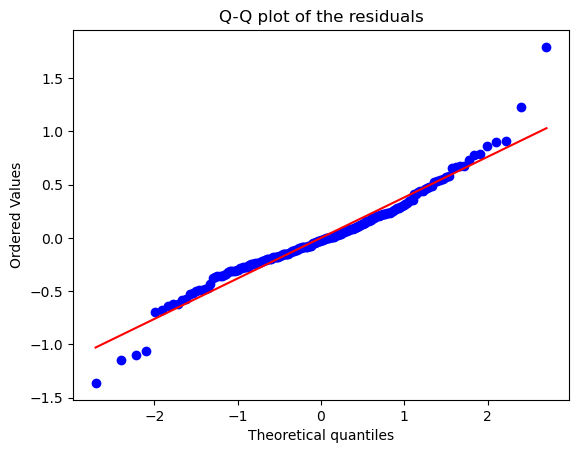

In [15]:
residuals = model.resid
fig = plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot of the residuals')
plt.show()

#### Independent --- Durbin-Watson test

In [16]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)
#based on test value < 2, it indecates there is positive autocorrelation. So multicollinearity happens

0.9257833735747016

#### Linearity --- Harvey-Collier test / residual vs fitted plot

In [17]:
from statsmodels.stats.diagnostic import linear_harvey_collier

In [18]:
hc_test = linear_harvey_collier(model, skip = 25)
print("Harvey-Collier test statistic:", hc_test)

Harvey-Collier test statistic: TtestResult(statistic=nan, pvalue=nan, df=nan)


Text(0, 0.5, 'Residuals')

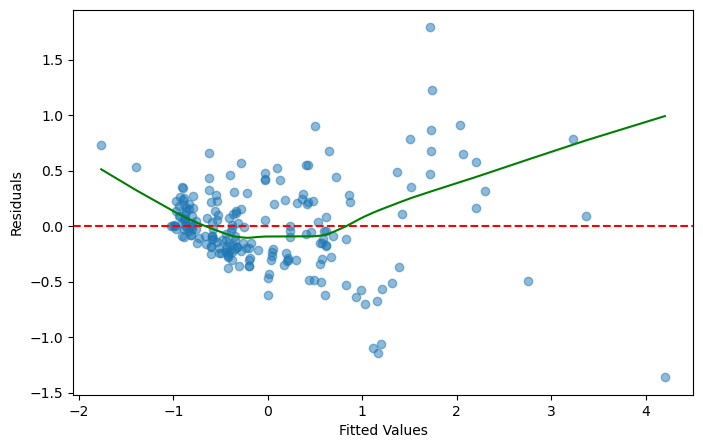

In [19]:
fitted_values = model.fittedvalues
residuals = model.resid

# Plotting Residuals vs Fitted with a Lowess line
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(0, color='red', linestyle='--')

# Adding a lowess smooth line
lowess = sm.nonparametric.lowess(residuals, fitted_values)
plt.plot(lowess[:, 0], lowess[:, 1], color='green', label='Lowess line')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

#### Homoscedasticity --- ncv Test

In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [21]:
_, pvalue, _, _ = het_breuschpagan(residuals, X)
print("P-value of the Breusch-Pagan test:", pvalue)
#Since P-value is small, so Homoscedasticity ncvTest passed

P-value of the Breusch-Pagan test: 6.562469593518851e-11


#### Multicollearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [23]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data
#from vif, several features are greater than 5. So we need to use the other stargeties like Ridge Regression or PCA

,feature,VIF
0,const,1.000000
1,wheelbase,7.322953
2,carlength,9.538981
3,carwidth,5.554251
4,carheight,2.220235
5,curbweight,16.374447
6,enginesize,6.648785
7,boreratio,2.151887
8,stroke,1.174582
9,compressionratio,2.177795


### Unusual observations --- residuals, high leverage points, High cooks distance

In [24]:
influence = model.get_influence()
summary_frame = influence.summary_frame()
#print(summary_frame)
print(summary_frame[['cooks_d', 'standard_resid', 'hat_diag']])

      cooks_d  standard_resid  hat_diag
0    0.000136        0.136356  0.092825
1    0.009235        1.124095  0.092825
2    0.001932       -0.414062  0.136248
3    0.001101        0.758762  0.026082
4    0.000748        0.532957  0.035560
..        ...             ...       ...
200  0.000992       -0.460057  0.061559
201  0.000497       -0.296144  0.073572
202  0.004425       -0.944715  0.064905
203  0.005729        0.757599  0.122602
204  0.005959        1.132390  0.061081

[203 rows x 3 columns]


In [25]:
k = len(predictor)
outliers = summary_frame.loc[(summary_frame['standard_resid'].abs() > 2) |
                             (summary_frame['hat_diag'] > 2*(k+1)/100) |
                             (summary_frame['cooks_d'] > 4/(df.shape[0]-k-1))]

print("Potential Outliers:")
print(outliers)

Potential Outliers:
     dfb_const  dfb_wheelbase  dfb_carlength  dfb_carwidth  dfb_carheight  \
8     0.137163      -0.216980       0.130595      0.469460       0.119632   
14    0.169053      -0.067447       0.178685     -0.111448       0.013061   
16    0.349380      -0.123185       0.504767     -0.409423      -0.078804   
17    0.170463       0.047826      -0.023377      0.197235       0.161898   
18    0.149009       0.123307      -0.159463     -0.199267       0.052457   
30    0.117332      -0.217973      -0.024583      0.245226       0.011948   
48    0.119931       0.149882      -0.037074     -0.225949      -0.186934   
49   -0.331473       0.019209      -0.276607      0.110834       0.648945   
57    0.128418       0.059952      -0.051860      0.025639      -0.220470   
70    0.150186       0.097937      -0.014843      0.102653      -0.135722   
72    0.147388      -0.557929      -0.147103      0.456408       0.030683   
74    0.173039      -0.005320      -0.072902      0.3085

In [26]:
outlier_criteria = ((summary_frame['standard_resid'].abs() > 2) |
                             (summary_frame['hat_diag'] > 2*(k+1)/100) |
                             (summary_frame['cooks_d'] > 4/(df.shape[0]-k-1)))
outlier_indices = summary_frame.loc[outlier_criteria].index
outlier_indices

Index([  8,  14,  16,  17,  18,  30,  48,  49,  57,  70,  72,  74, 101, 102,
       103, 126, 127, 128, 129, 134, 155],
      dtype='int64')

In [27]:
df.reset_index(drop=True, inplace=True)
df = df.drop(index=outlier_indices, axis = 0)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
199,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
201,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


### Non-parametric model --- KNN

#### KNN regression -- first implementation

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
X = df.drop(columns = ["price"])
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predict using the model
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.31670899734037283


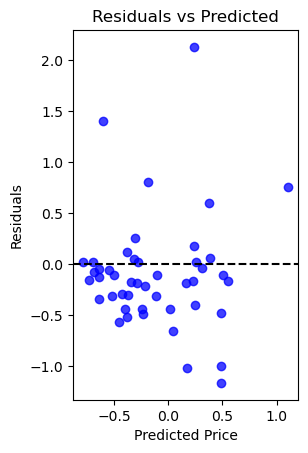

In [31]:
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.75, color='blue')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')  # Horizontal line at 0

plt.show()

#### KNN regression --- parameter adjustment

In [32]:
mse_lst = []
k_lst = []
r2_lst = []
for k_temp in range (1, 20):
    knn_regressor = KNeighborsRegressor(n_neighbors=k_temp)
    knn_regressor.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = knn_regressor.predict(X_test)
    r2_lst.append(r2_score(y_test, y_pred))
    mse_lst.append(mean_squared_error(y_test, y_pred))
    k_lst.append(k_temp)

In [33]:
KNN_df = pd.DataFrame({
    "k" : k_lst, 
    "mse" : mse_lst, 
    "r2" : r2_lst
})
KNN_df = KNN_df.sort_values(by = ["mse", "r2"], ascending = [True, False])
KNN_df

,k,mse,r2
0,1,0.218563,0.562518
1,2,0.222925,0.553788
2,3,0.255114,0.489357
4,5,0.316709,0.366067
3,4,0.317619,0.364245
5,6,0.345184,0.309071
6,7,0.372841,0.253711
10,11,0.388923,0.221522
11,12,0.394819,0.209721
7,8,0.396130,0.207096


### Non-parametric model --- Decision Tree or Random Forest

#### First implementation

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [36]:
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.040589364514088115


#### parameter adjustment

In [51]:
mse_lst = []
r2_lst = []
n_estimators_lst = []
max_depth_lst = []
min_samples_split_lst = []
min_samples_leaf_lst = []
count = 1
for n_temp in range (100, 501, 50):
    for max_depth_temp in range (2, 27):
        for min_samples_split_temp in range (2, 20):
            for min_samples_leaf_temp in range (1, 20):
                if (count % 1000 == 0):
                    print (count)
                count += 1
                #fit random forest model
                rf = RandomForestRegressor(n_estimators=n_temp, max_depth = max_depth_temp, 
                                           min_samples_split = min_samples_split_temp, 
                                           min_samples_leaf = min_samples_leaf_temp, random_state=42)
                rf.fit(X_train, y_train)
                predictions = rf.predict(X_test)
                mse_lst.append(mean_squared_error(y_test, predictions))
                r2_lst.append(r2_score(y_test, y_pred))
                n_estimators_lst.append(n_temp)
                max_depth_lst.append(max_depth_temp)
                min_samples_split_lst.append(min_samples_split_temp)
                min_samples_leaf_lst.append(min_samples_leaf_temp)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000


In [52]:
rf_df = pd.DataFrame({
    "n_estimators" : n_estimators_lst, 
    "max_depth" : max_depth_lst, 
    "min_samples_split" : min_samples_split_lst, 
    "min_samples_leaf" : min_samples_leaf_lst, 
    "mse" : mse_lst, 
    "r2" : r2_lst
})
rf_df = rf_df.sort_values(by = ["mse", "r2"], ascending = [True, False])
rf_df.to_csv("rf_df.csv")
rf_df

,n_estimators,max_depth,min_samples_split,min_samples_leaf,mse,r2
37620,300,12,2,1,0.039987,0.103695
20520,200,12,2,1,0.040054,0.103695
28405,250,10,3,1,0.040074,0.103695
45847,350,11,3,1,0.040225,0.103695
45486,350,10,2,1,0.040268,0.103695
...,...,...,...,...,...,...
265,100,2,15,19,0.178292,0.103695
284,100,2,16,19,0.178292,0.103695
303,100,2,17,19,0.178292,0.103695
322,100,2,18,19,0.178292,0.103695


#### Evaluation model --- cross validation

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
rf = RandomForestRegressor(n_estimators=300, max_depth = 12, min_samples_split = 2, min_samples_leaf = 1, random_state=42)

K_fold = 10
cv_scores_mse = cross_val_score(rf, X, y, cv=K_fold, scoring='neg_mean_squared_error')
mse_scores = -cv_scores_mse  # Negating to get positive MSE values
mean_mse = np.mean(mse_scores)

# Perform cross-validation for R^2
cv_scores_r2 = cross_val_score(rf, X, y, cv=K_fold, scoring='r2')
mean_r2 = np.mean(cv_scores_r2)

print(f"Average MSE: {mean_mse:.4f}")
#print(f"MSE Scores for each fold: {mse_scores}")
print(f"Average R^2: {mean_r2:.4f}")
#print(f"R^2 Scores for each fold: {cv_scores_r2}")

Average MSE: 0.1947
Average R^2: 0.2290


#### Evaluation model --- overfitting / underfitting

In [47]:
rf = RandomForestRegressor(n_estimators=300, max_depth = 12, 
                                           min_samples_split = 2, 
                                           min_samples_leaf = 1, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
print("MSE on training data:", mean_squared_error(y_train, predictions))
print("R2 on training data:", r2_score(y_train, predictions))

MSE on training data: 0.012535191529457191
R2 on training data: 0.9775903146737492


In [48]:
rf = RandomForestRegressor(n_estimators=300, max_depth = 12, 
                                           min_samples_split = 2, 
                                           min_samples_leaf = 1, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("MSE on training data:", mean_squared_error(y_test, predictions))
print("R2 on training data:", r2_score(y_test, predictions))

MSE on training data: 0.039986855468975964
R2 on training data: 0.9199613116699229


### Non-parametric model --- Local Polynomial Regression --- designed for continous data, so we cant use it. 

### Non-parametric model --- Kernel Smoothing

### Non-parametric model --- SVR

In [92]:
from sklearn.svm import SVR

In [96]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = svr_rbf.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))


Mean squared error: 0.37


In [97]:
y_pred

array([-0.39688887, -0.61505872, -0.11763007,  0.05440522, -0.09077022,
       -0.10898353, -0.11678483, -0.06477673,  0.01855478, -0.01845958,
        0.38397989, -0.0820216 , -0.18623214, -0.08478346, -0.38124453,
       -0.10289359, -0.27526597, -0.07899956,  0.24037602, -0.0819639 ,
        0.48644497, -0.08585265, -0.06959325, -0.23816878,  0.11345467,
       -0.08606038,  0.2242756 , -0.11769582, -0.07734829, -0.07304148,
        0.05465251, -0.30758005, -0.08565114, -0.47822721, -0.19065507,
       -0.37210839, -0.59236857, -0.1693858 , -0.08309658, -0.49509787,
        0.76383576, -0.08327391, -0.19023479, -0.08127326,  0.00077929,
       -0.24757955])

### Non-parametric model --- Ensemble Method GBM/XGBoost

#### GBM method

##### First implementation

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer

In [107]:
# Create a Gradient Boosting Classifier model
gbm_classifier = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Model MSE: {mse:.2f}")
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Model MSE: 0.04
R^2 score: 0.92


##### parameter adjustment

In [111]:
param_grid = {
    'n_estimators': np.arange(100, 301, 50),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [113]:
scorers = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

gbm_regressor = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbm_regressor, param_grid=param_grid, scoring=scorers, refit='mse', cv=10, verbose=1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameters and best scores
print("Best parameters based on MSE:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)  # Negate because we used greater_is_better=False

# Extracting the best model and evaluating it separately for R2
best_model = grid_search.best_estimator_
best_r2 = r2_score(y, best_model.predict(X))
print("R2 Score of the best model:", best_r2)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
Best parameters based on MSE: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE: 0.14940153031432532
R2 Score of the best model: 0.9931402661649679


##### evaluation: underfitting or overfitting

In [116]:
gbm_regressor = GradientBoostingRegressor(learning_rate = .1, max_depth = 3, 
                                          min_samples_leaf = 1, min_samples_split = 10, 
                                          n_estimators = 150, random_state=42)
gbm_regressor.fit(X_train, y_train)
y_pred = gbm_classifier.predict(X_train)
# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
print(f"Model MSE for training set: {mse:.2f}")
print('R^2 score for training set: %.2f' % r2_score(y_train, y_pred))

Model MSE for training set: 0.00
R^2 score for training set: 0.99


In [118]:
gbm_regressor = GradientBoostingRegressor(learning_rate = .1, max_depth = 3, 
                                          min_samples_leaf = 1, min_samples_split = 10, 
                                          n_estimators = 150, random_state=42)
gbm_regressor.fit(X_train, y_train)
y_pred = gbm_classifier.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Model MSE for testing set: {mse:.2f}")
print('R^2 score for testing set: %.2f' % r2_score(y_test, y_pred))

Model MSE for testing set: 0.04
R^2 score for testing set: 0.92


#### XGBoost method

##### First implementation

In [30]:
import xgboost as xgb

In [121]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10).fit(X_train, y_train)

In [122]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 0.29094514002587485
R^2 score: 0.42


##### parameter adjustment

In [123]:
param_grid = {
    'n_estimators': np.arange(100, 301, 50),
    'colsample_bytree': np.arange(0.1, 1, 0.1),
    'max_depth': np.arange(2, 15),
    'learning_rate': np.arange(0.1, 1, 0.1),
}

In [124]:
scorers = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

xgb_regressor = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring=scorers, refit='mse', cv=10, verbose=1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameters and best scores
print("Best parameters based on MSE:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)  # Negate because we used greater_is_better=False

# Extracting the best model and evaluating it separately for R2
best_model = grid_search.best_estimator_
best_r2 = r2_score(y, best_model.predict(X))
print("R2 Score of the best model:", best_r2)

Fitting 10 folds for each of 5265 candidates, totalling 52650 fits
Best parameters based on MSE: {'colsample_bytree': 0.30000000000000004, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}
Best MSE: 0.13473859304510996
R2 Score of the best model: 0.9971011813899419


##### Evaluation: overfitting or underfitting

In [31]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.30000000000000004, learning_rate = 0.5,
                max_depth = 2, alpha = 10, n_estimators = 200).fit(X_train, y_train)
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")
print('R^2 score: %.2f' % r2_score(y_train, y_pred))

Mean Squared Error: 0.17713698392678634
R^2 score: 0.68


In [32]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.30000000000000004, learning_rate = 0.5,
                max_depth = 2, alpha = 10, n_estimators = 200).fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 0.17642851769913362
R^2 score: 0.65
